# Análise dos dados de uma empresa de bicicletas
#### Fábio Dias Rezende Carvalho
#### E-mail: fabior.carvalho@hotmail.com
#### git-hub: https://github.com/FabioDiasRC

Esse arquivo tem como objetivo fazer o trabalho de finalização do curso do google data analytics, baseado nos pedidos encontrados no arquivo 'src/estudo_de_caso_bicicletas.docx'. Os dados são encontrados [Nesse link](https://divvy-tripdata.s3.amazonaws.com/index.html), onde os dados são gerados pela empresa e disponibilizados para estudo, os dados aqui encontrados e a empresa cyclistic não são reais. 

# Cenário do projeto

A idéia é simular o trabalho de uma analista de dados júnior que atua na equipe de marketing da Cyclistic, uma empresa de compartilhamento de bicicletas de Chicago. O foco aqui é entender como os usuários anuais divergem dos usuários casuais e tentar otimizar o número de clientes anuais, uma vez que a empresa afirma que a maior parte de seu rendimento vem de usuários anuais, chamados de membro Cyclistic. Para isso eu devo fazer análises e ter insights convincentes com boas visualizações de dados.

A empresa possui 3 tipos de bicicletas (bicicletas reclináveis, triciclos manuais e bicicletas de carga), as bicicletas assistivas, que atendem pessoas com deficiência atende 8% do total. A empresa afirma que na média 30% dos usuários anualmente utilizam para trabalhar diariamente, mas no geral os usuários utilizam o serviço por lazer (farei uma análise especifica para verificar essa informação da empresa).

A equipe de marketing pede a respostas de três perguntas específicas:

* Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?
* Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?
* Como a Cyclistc pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

## Preparando os dados

Seguindo a fonte citada no topo desse texto ([Nesse link](https://divvy-tripdata.s3.amazonaws.com/index.html)) eu coletei os dados de agosto de 2022, descrito como '08_22.csv', até julho de 2023, descrito como '07_23.csv', todos os 12 meses analisados levam esse mesmo padrão de nome. Aqui tem-se a análise primária dos dados, eles são confiáveis, pois são gerados pela própria empresa que aluga as bicicletas, sendo também originais, abrangentes para o período de testes pedido, no caso os últimos 12 meses, sendo relevanes e atuais, descrevendo também a fonte de forma clara. Definido a integridade dos dados podemos dar continuidade a análise.

Para essa análise vou trabalhar com o pandas, biblioteca python que é versatil e vai atender muito bem minhas necessidades de análise, também estou visando meu desenvolvimento nessa biblioteca focando a longo prazo trabalhar com ciência de dados.

In [3]:
import pandas as pd
ago_22 = pd.read_csv('src/dados_originais/08_22.csv')
ago_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785932 entries, 0 to 785931
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             785932 non-null  object 
 1   rideable_type       785932 non-null  object 
 2   started_at          785932 non-null  object 
 3   ended_at            785932 non-null  object 
 4   start_station_name  673895 non-null  object 
 5   start_station_id    673895 non-null  object 
 6   end_station_name    665410 non-null  object 
 7   end_station_id      665410 non-null  object 
 8   start_lat           785932 non-null  float64
 9   start_lng           785932 non-null  float64
 10  end_lat             785089 non-null  float64
 11  end_lng             785089 non-null  float64
 12  member_casual       785932 non-null  object 
dtypes: float64(4), object(9)
memory usage: 78.0+ MB


Aqui temos a descrição de todas as colunas e o que elas trazem com dados, sendo:
* ride_id: identificador do passeio;
* rideable_type: tipo de bicicleta utilizada no passeio;
* started_at: momento de inicio do passeio;
* ended_at: momento de encerramento do passeio;
* start_station_name: nome da estação onde foi retirada a bicicleta;
* start_station_id: identificador da estação de retirada da bicicleta;
* end_station_name: estação de entrega da bike;
* end_station_id: identificador da estação de entrega da bicicleta;
* start_lat: latitude de inicio do passeio;
* start_lng: longitude do começo do passeio;
* end_lat: latitude de onde a bicicleta foi entregue;
* end_lng: longitude de onde a bicicleta foi entregue;
* member_casual: se o cliente é um usuário membro da empresa ou se ele é um usuário casual.

Agora que temos uma idéia geral da disponibilisação dos dados, verificamos se todos os meses seguem esse mesmo padrão e se podem ser nomeados com a mesma lógica do primeiro mês, então tem-se:

In [4]:
set_22 = pd.read_csv('src/dados_originais/09_22.csv')
out_22 = pd.read_csv('src/dados_originais/10_22.csv')
nov_22 = pd.read_csv('src/dados_originais/11_22.csv')
dez_22 = pd.read_csv('src/dados_originais/12_22.csv')
jan_23 = pd.read_csv('src/dados_originais/01_23.csv')
fev_23 = pd.read_csv('src/dados_originais/02_23.csv')
mar_23 = pd.read_csv('src/dados_originais/03_23.csv')
abr_23 = pd.read_csv('src/dados_originais/04_23.csv')
mai_23 = pd.read_csv('src/dados_originais/05_23.csv')
jun_23 = pd.read_csv('src/dados_originais/06_23.csv')
jul_23 = pd.read_csv('src/dados_originais/07_23.csv')

#mes.info() ->  verifiquei se todos seguem o mesmo padrão

Verificando mês a mês uma análise superficial dos dados utilizando a função 'mes.info()', alguns pontos são relevantes:
* Alguns dados da estação de entrega, nas colunas de nomes de estação e id de estação (end_station_name, end_station_id, start_station_name, start_station_id), não possuem valores definidos, como isso ocorre em muitas linhas dessas colunas eu decidi por remover essas colunas completamente, tendo em vista que os valores de longitude e latitude estão preenchidos, acredito que elas possam ser trabalhadas para calcular a distância percorrida pelo usuário caso necessário e tomarei essa decisão mais a frente;
* Os dados de retirada e entrega estão como 'object', eles serão passados para datas de forma correta e ajudarão na análise de comportamento de consumo futuramente;
* Também serão criadas duas novas colunas, uma sendo o tempo de duração das viagens (momento da entrega da bicicleta menos o momento da retirada da bicicleta) e outra sendo definido o dia da semana que essa viagem ocorreu.

In [5]:
df = [ago_22, set_22, out_22, nov_22,dez_22, jan_23,fev_23, mar_23, abr_23, mai_23, jun_23, jul_23]

for i in range(len(df)):
  
  #remover as colunas 'start_station_name','start_station_id','end_station_name','end_station_id'
  df[i] = df[i].drop(['start_station_name','start_station_id','end_station_name','end_station_id'], axis=1)
  
  #colocando as colunas de momento de retirada e da entrega da bicicleta no formato de data
  df[i]['started_at'] = pd.to_datetime(df[i]['started_at'],  format='%Y-%m-%d %H:%M:%S')
  df[i]['ended_at'] = pd.to_datetime(df[i]['ended_at'],  format='%Y-%m-%d %H:%M:%S')
  
  #calculando o tempo de utilização das bikes por viagem
  df[i]['total_time_hours'] = (df[i]['ended_at']-df[i]['started_at']).dt.total_seconds()/3600
  
  #separando cada viagem realizada no dia da semana que ela foi efetuada
  df[i]['day_of_week'] = df[i]['started_at'].dt.day_name()
  
  #verificacao de dados nulos
  #df[i].isnull().sum

Um outro ponto a ser citado para esse conjunto de dados é a quantidade de dados nulos que ele possue, que no caso se resume a poucos valores comparado com o total de registros, sendo verificado utilizando o código 'df[i].isnull().sum()', lembrando que esses dados nulos ocorrem unica e exclusivamente na coluna latitude e longitude de entrega das bicicletas, logo, não removerei esses valores do meu conjunto de dados por hora, caso seeja necessário um estudo de distância entre ponto de retirada e ponto de entrega eles serão trabalhados.

Definido isso agora vamos manter essa nomenclatura e também o meu data frame com os valores mensais pois futuramente eu vou utilizar uma análise de utilização mensal para os membros e os usuários casuais, será uma análise da diferente utilização durante as estações do ano, mas por hora farei um arquivo com um 'csv' anual do projeto.

In [6]:
#colocando em um unico arquivo denominado 'last_year'
last_year = pd.concat([df[0],df[1],df[2],df[3],df[4],df[5],df[6],df[7],df[8],df[9],df[10],df[11]])

#salvando os dados em csv, atenção para onde esse arquivo salvo será mandado
#last_year.to_csv('src/last_year.csv')

Faremos uma análise superficial dos valores encontrados pela cyclist no último ano, sendo:

In [7]:
media_minutos = last_year['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários: {media_minutos.round(2)} minutos')

Média de minutos utilizados pelos usuários: 18.36 minutos


In [8]:
maior_passeio = last_year['total_time_hours'].max()/24
print(f'Passeio mais demorado dos usuários: {maior_passeio.round(0)} dias')

Passeio mais demorado dos usuários: 36.0 dias


Esse alto valor nos passeios do usuario indica forte presença de outliers em relação ao tempo de utilização, entretanto para essa analise vamos relevar esse ponto, mas importante a anotações para caso sejam feitos projetos futuros baseado nesse notebook.

Aqui vamos fazer uma análise sobre a utilização durante o último ano focado nos dias da semana, onde serão analisados os valores totais por dia, assim como os valores parciais de membros e usuários casuais da empresa.

In [9]:
#contando os valores totais por dia da semana
days_of_week_total= last_year['day_of_week'].value_counts()

#contando apenas os valores referentes a utilização por membros da cyclistic
days_of_week_members = last_year.query('member_casual == "member"')['day_of_week'].value_counts()

#contando apenas os valore referentes a utilização por usuários casuais da cyclistic
days_of_week_casual= last_year.query('member_casual == "casual"')['day_of_week'].value_counts()

#mudança do nome dos dias da semana
dias = {
  'Saturday':'Sabado',
  'Thursday':'Quinta',
  'Friday':'Sexta',
  'Wednesday':'Quarta',
  'Tuesday':'Terca',
  'Monday':'Segunda',
  'Sunday':'Domingo'
}

#trabalhando os valores definidos a cima para serem alocados em um único dataframe.
df_total = pd.DataFrame(days_of_week_total).reset_index()
df_total.columns = ['dias', 'total']
df_members = pd.DataFrame(days_of_week_members).reset_index()
df_members.columns = ['dias', 'members']
df_casual = pd.DataFrame(days_of_week_casual).reset_index()
df_casual.columns = ['dias', 'casual']

#necessários dois merges, pois a função merge só aceita dois argumentos por vez
df = pd.merge(df_total, df_members, on='dias')
df = pd.merge(df, df_casual, on='dias')

#colocando os dias da semana em português e de forma ordenada
df['dias'] = df['dias'].apply(lambda x: dias[x])
dias_ordenados = ['Domingo','Segunda','Terca','Quarta', 'Quinta', 'Sexta', 'Sabado']
df['dias'] = pd.Categorical(df['dias'], categories=dias_ordenados, ordered=True)
df = df.sort_values('dias')

df

,dias,total,members,casual
6,Domingo,719145,386524,332621
5,Segunda,759426,501472,257954
4,Terca,808864,551974,256890
3,Quarta,828316,565905,262411
1,Quinta,859139,569888,289251
2,Sexta,851871,516742,335129
0,Sabado,896845,461546,435299


Aqui fica claro que o dia da semana com mais passeios se encontra no sábado, sendo o segundo menor dia com utilização de membros da Cyclistic, mas o dia com maior utilização por parte de usuários casuais, seguidos por sexta e domingo com valores de utilização por parte de usuários casuais bem próximos.

Abaixo vamos criar uma visualização gráfica dos valores.

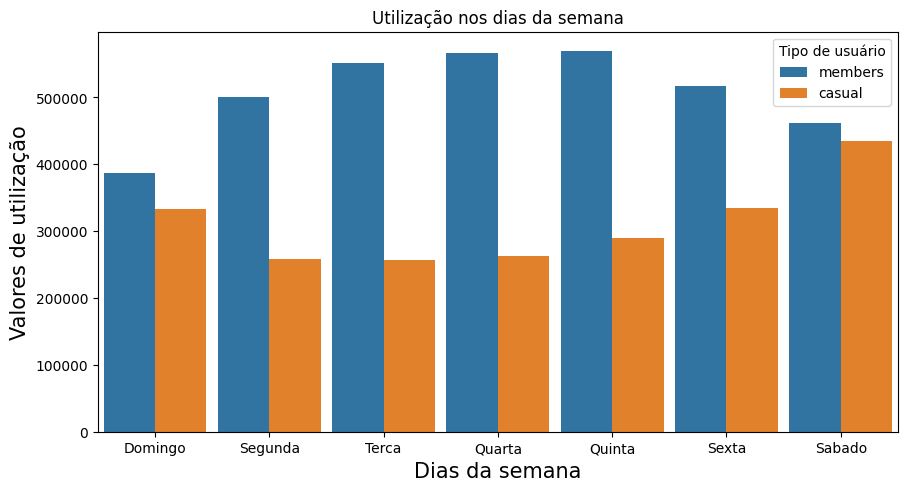

In [10]:
#transformar esse data frame em gráfico
import seaborn as sns
import matplotlib.pyplot as plt

#passar o data frame do formato largo para o formato longo
df_melt = df.melt(id_vars='dias', value_vars=['members', 'casual'], var_name='Tipo de usuário', value_name='valores')

fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0,0,1,1])
sns.barplot(data=df_melt, x='dias', y='valores', hue='Tipo de usuário', width=0.9)
eixo.set_title('Utilização nos dias da semana')
eixo.set_xlabel('Dias da semana', fontsize = 15)
eixo.set_ylabel('Valores de utilização', fontsize = 15)
plt.show()

Agora vamos observar o tempo de utilização por tipo de usuário que se encontram nos nossos dados, assim como a duração dos passeios pelos dias da semana.

In [11]:
#média de tempo para usuários cyclistic
media_tempo_membros = last_year.query('member_casual == "member"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários Cyclistic: {media_tempo_membros.round(2)} minutos')

Média de minutos utilizados pelos usuários Cyclistic: 12.38 minutos


In [12]:
#média de tempo para usuários casuais
media_tempo_casual = last_year.query('member_casual == "casual"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários casuais: {media_tempo_casual.round(2)} minutos')

Média de minutos utilizados pelos usuários casuais: 28.14 minutos


In [13]:
#média de tempo por dia da semana
media_tempo_segunda = last_year.query('day_of_week == "Monday"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários na segunda: {media_tempo_segunda.round(2)} minutos')

media_tempo_terca = last_year.query('day_of_week == "Tuesday"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários na Terça: {media_tempo_terca.round(2)} minutos')

media_tempo_quarta = last_year.query('day_of_week == "Wednesday"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários na quarta: {media_tempo_quarta.round(2)} minutos')

media_tempo_quinta = last_year.query('day_of_week == "Thursday"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários na quinta: {media_tempo_quinta.round(2)} minutos')

media_tempo_sexta = last_year.query('day_of_week == "Friday"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários na sexta: {media_tempo_sexta.round(2)} minutos')

media_tempo_sabado = last_year.query('day_of_week == "Saturday"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários no sabado: {media_tempo_sabado.round(2)} minutos')

media_tempo_domingo = last_year.query('day_of_week == "Sunday"')['total_time_hours'].mean()*60
print(f'Média de minutos utilizados pelos usuários no domingo: {media_tempo_domingo.round(2)} minutos')

Média de minutos utilizados pelos usuários na segunda: 17.08 minutos
Média de minutos utilizados pelos usuários na Terça: 16.11 minutos
Média de minutos utilizados pelos usuários na quarta: 15.66 minutos
Média de minutos utilizados pelos usuários na quinta: 15.91 minutos
Média de minutos utilizados pelos usuários na sexta: 18.27 minutos
Média de minutos utilizados pelos usuários no sabado: 22.95 minutos
Média de minutos utilizados pelos usuários no domingo: 22.63 minutos


Aqui vemos uma correspondência correta nos dados, uma vez que a utilização do tempo médio de usuários casuais é maior que e o tempo médio da utilização de usuários membros Cyclistic, então os dias que possuem mais usuários casuais tem a média do tempo de utilização maior que os dias que possuem menos usuários casuais.

## Uma análise em relação as estações do ano

Como citado mais acima farei agora uma análise de como essa utilização se modifica durante as estações do ano, mas principalmente avaliando a estação do verão, que tendo em mente que a empresa é de Chicago, então temos uma análise referente aos meses de junho, julho e agosto, assim como os dois meses adjacentes a eles, maio e setembro, que ainda contam com uma temperatura e sensação térmica mais adequada para passeios de bicicleta, o que deve influênciar no comportamento dos usuários da empresa.

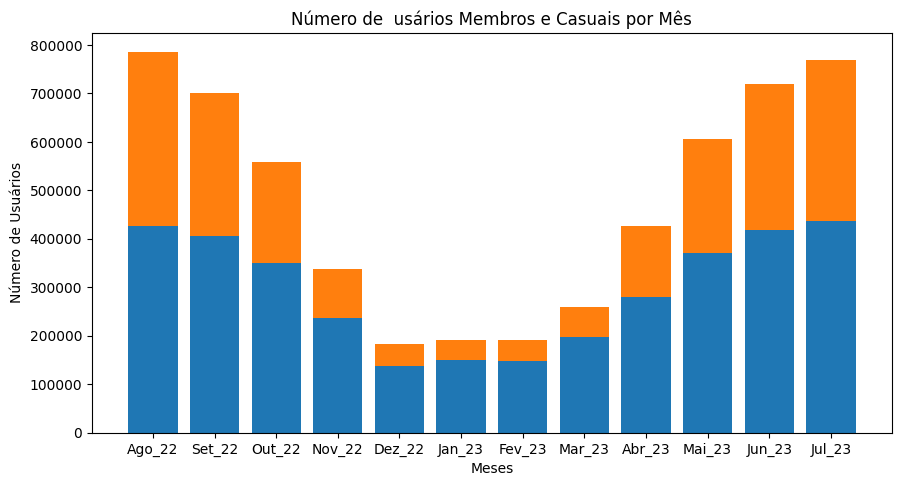

In [14]:
ago_members = ago_22.groupby(['member_casual']).size()
set_members = set_22.groupby(['member_casual']).size()
out_members = out_22.groupby(['member_casual']).size()
nov_members = nov_22.groupby(['member_casual']).size()
dez_members = dez_22.groupby(['member_casual']).size()
jan_members = jan_23.groupby(['member_casual']).size()
fev_members = fev_23.groupby(['member_casual']).size()
mar_members = mar_23.groupby(['member_casual']).size()
abr_members = abr_23.groupby(['member_casual']).size()
mai_members = mai_23.groupby(['member_casual']).size()
jun_members = jun_23.groupby(['member_casual']).size()
jul_members = jul_23.groupby(['member_casual']).size()

df = pd.DataFrame({
  'Membros': [ago_members['member'], set_members['member'], out_members['member'], nov_members['member'], dez_members['member'], jan_members['member'], fev_members['member'], mar_members['member'], abr_members['member'], mai_members['member'], jun_members['member'], jul_members['member']],

  'Casuais': [ago_members['casual'], set_members['casual'], out_members['casual'], nov_members['casual'], dez_members['casual'], jan_members['casual'], fev_members['casual'], mar_members['casual'], abr_members['casual'], mai_members['casual'], jun_members['casual'], jul_members['casual']]
})

months = ['Ago_22', 'Set_22', 'Out_22', 'Nov_22', 'Dez_22', 'Jan_23', 'Fev_23', 'Mar_23', 'Abr_23', 'Mai_23', 'Jun_23', 'Jul_23']

fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0,0,1,1])
eixo.bar(months, df['Membros'], label='Membros')
eixo.bar(months, df['Casuais'], bottom=df['Membros'], label='Casuais')
eixo.set_xlabel('Meses')
eixo.set_ylabel('Número de Usuários')
eixo.set_title('Número de  usários Membros e Casuais por Mês')
plt.show()

#lista dos valores em número para os membros e casuais de todos os meses do ano, caso desejado a visualização direta
#values_anual_members = [ago_members, set_members, out_members, nov_members, dez_members, jan_members, fev_members, mar_members, mai_members, jun_members, jul_members]
#values_anual_members

Podemos observar que não so aumentam o número total de usuários na época de verão e seus dois meses adjacentes, mas também uma maior utilização por parte dos usuários casuais da cyclistic

## Conclusões da análise e insights da abordagem que recomendo para a parte interessada

Aqui temos que ter em mente que as três perguntas que deram o norte para minha análise:

* **Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?**

Com nossa análise podemos notar que a média de tempo de utilização dos usuários casuais são 28 minutos, contra a média de 12 minutos dos usuários membros da empresa. Também temos uma mudança nítida pela utilização durante a semana, uma vez que a maior parcela de usuários casuais se encontra nos dias do fim de semana, sexta, sábado e domingo, logo, podemos definir que a utilização dos usuários casuais se relacionam muito mais com passeios e lazer do que os usuários membros, que tendem a utilizar as bicicletas mais durante os dias da semana. Além disso, temos esses valores muito diferentes durante os meses do ano, uma vez que os meses de verão, e seus dois meses adjacentes, encontram os maiores valores de usuários casuais durante o ano.

* **Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?**

Os usuários casuais poderiam utilizar os planos anuais se forem influenciados a começarem a ir trabalhar de bicicleta, mas é algo mais dificil de se influenciar com propagandas diretas da empresa, pois é um habito mais complexo de ser modificado. A utilização desses usuários ocorre em maior peso durante as estações do ano que possuem melhor temperatura para utilizar a bicicleta como um lazer, onde a motivação para  esses usuários se tornarem membros pode ocorrer pelo próprio incentivo da empresa, com o impulsionamento de marketing digital correto nas mídias digitais, as datas indicadas estão descritas abaixo, assim como incentivo financeiro para épocas do ano, por exemplo, uma promoção para os 5 meses do ano que são mais utilizados pelo usuários casuais, apesar de não ser um plano para o ano todo pode-se chegar a um maior lucro caso os usuários casuais assinem esse plano sazional da Cyclistic, onde essa promoção deve ser impulsionada nos meses abril, maio e junho, onde os usuários se sentiriam mais tentados a comprar esse pacote sazional por terem mais tempo para utilizar esse pacote.

* **Como a Cyclistc pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?**

Os esforços por parte da Cyclistic em mídia digital deve levar em conta os comportamentos dos usuários durante o ano, então existe a possibilidade de impulsionar os anúncios em mídia digital da empresa durante os meses com melhor clima para os usuários (maio, junho, julho, agosto e setembro), que são os meses que mais usuários casuais utilizam o serviço da empresa. Também é interessante colocar esses anúncios focados nos dias da semana com mais usuários casuais, sendo sexta, sábado e domingo a recomendação para esses dias.

